$0.3<z_\text{PAUS}<0.4$ map

In [59]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as tick
import astropy.cosmology
import scipy.stats
import time
from useful_funcs import PAUSflux_to_ABmag
import h5py
import matplotlib.colors
import os
from SAVEFIG import main as custom_SAVEFIG
import socket
import IPython.display as display

#matplotlib.rcParams['agg.path.chunksize'] = 10000

In [3]:
data = pd.read_pickle("../../Data/Object_zs_zp_181203_130401.pkl.gz")

In [5]:
# data.columns.values

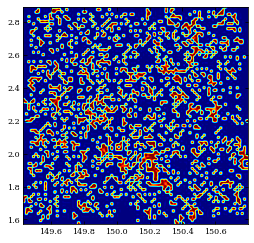

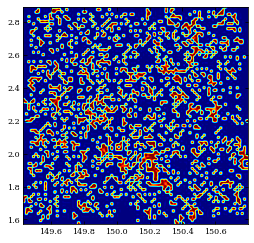

In [62]:
plt.figure(figsize=(5,5),dpi=300)

mask = (data['zb'] <= 0.39) & (data['zb'] >= 0.35)

data_cut = data.loc[mask]

ra_width = data['ra'].max() - data['ra'].min()
dec_width = data['dec'].max() - data['dec'].min()

print("Area: {:.2f} sq deg".format(ra_width*dec_width))

print(ra_width,dec_width)

p = 75
plt.show(block=False)
for p in np.arange(10,100,5).astype('int'):

    pixs = [np.floor(p*dec_width/ra_width).astype('int'),p]

    imags,xedges,yedges,binnumbers = scipy.stats.binned_statistic_2d(data_cut['ra'],data_cut['dec'],data_cut['i_auto'],'median',bins=pixs)
    # print(xedges[:5],yedges[:5])
    imags = np.nan_to_num(imags)

    # print(imags.min())
    imags = np.floor(imags/np.nanmax(imags) * 255).astype('int')

    # print(imags.min(),imags.max())
    plt.cla()
    display.clear_output(wait=True)
    plt.imshow(imags,aspect='equal',cmap='jet',interpolation ='spline36',origin='lower',extent=(data['ra'].min(),data['ra'].max(),data['dec'].min(),data['dec'].max()))
    # plt.axis('equal')
    plt.draw()
    display.display(plt.gcf())

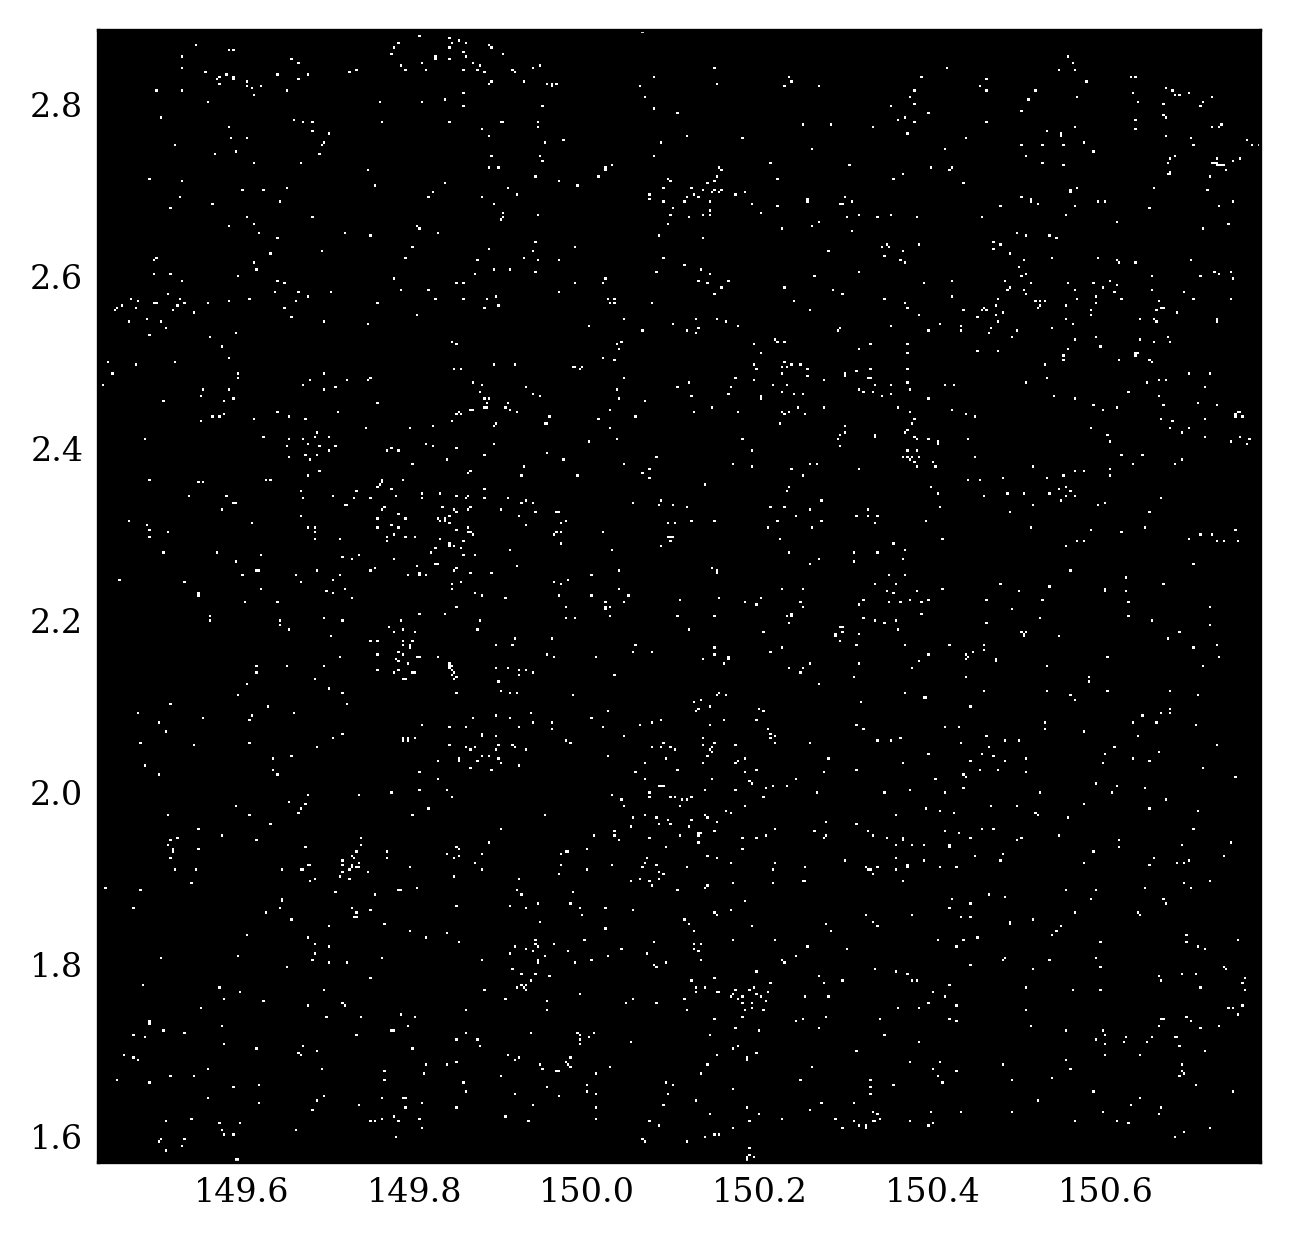

In [42]:
plt.figure(figsize=(5,5),dpi=300)
pixs=[500,500]
bounds = [0,0.9,1e6]
norm = matplotlib.colors.BoundaryNorm(boundaries=bounds, ncolors=256)
plt.hist2d(data_cut['ra'],data_cut['dec'],pixs,cmap='binary_r',norm=norm)
plt.axis('equal')
plt.show()